<a href="https://colab.research.google.com/github/ydicsey/ipynb_code/blob/main/Isocontour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data2D = 0
data2DPlot = 0
p_0 = 0
p_1 = 0
p_2 = 0
p_3 = 0

##### draw a line segment between [x0, y0] -> [x1, y1]. color: color of the line semgne
##### DO NOT modify this function
def plotOneEdge(x0, y0, x1, y1, color="white"):
#    plt.plot([y0*5,y1*5], [x0*5,x1*5], linewidth=1, color=color)
    plt.plot([x0*5,x1*5], [y0*5,y1*5], linewidth=1, color=color)

##### x, y: location. Return: data value at [x,y]
##### DO NOT modify this function
def getDataValue(x, y):
    return data2D[x, y]

##### data loading and setup/plot image
##### DO NOT modify this function
def Initialize():
    global data2D
    global data2DPlot
    data2D = np.load("rawData.npy").transpose()
    data2DPlot = np.load("plotData.npy")

    plt.rcParams['figure.figsize'] = [20, 20]
    plt.axis('off')
    plt.imshow(data2DPlot)
    plt.colorbar()

##### (TODO) WORK on this function
##### compute and draw the isocontour of the given datavalue ("isovalue")
##### color: isocontour color
##### you should use "getDataVlue()" to get the data you want and use "plotOneEdge()" to a segment of the isocontour
##### I do not mind the computation is efficnet or not
def computePlotIsoContour( isovalue, color ):
    # print("TODO: you shoud implment this function -> computePlotIsoContour( isovalue, color )")
    for x in range(198):
        for y in range(198):
            neg_flag = 0;
            p_0 = getDataValue(x, y);
            p_1 = getDataValue(x+1, y);
            p_2 = getDataValue(x+1, y+1); 
            p_3 = getDataValue(x, y+1);
            
            p_0 = p_0 - isovalue;
            p_1 = p_1 - isovalue;
            p_2 = p_2 - isovalue;
            p_3 = p_3 - isovalue;
            
            if p_0 < 0:
                neg_flag += 1;
            if p_1 < 0:
                neg_flag += 1;
            if p_2 < 0:
                neg_flag += 1;
            if p_3 < 0:
                neg_flag += 1;
            
            # 負數 = inside
            # 有一個負數
            if neg_flag == 1:
                if p_0 < 0:
                    x0 = (p_0)/(p_0-p_1) + x;
                    y0 = y;
                    x1 = x;
                    y1 = (p_0)/(p_0-p_3) + y;
                    # print(x0, y0, x1, y1)
                    plotOneEdge(x0, y0, x1, y1, color);
                if p_1 < 0:
                    x0 = (p_1)/(p_1-p_0)*-1 + x+1;
                    y0 = y;
                    x1 = x+1;
                    y1 = (p_1)/(p_1-p_2) + y;
                    plotOneEdge(x0, y0, x1, y1, color);
                if p_2 < 0:
                    x0 = (p_2)/(p_2-p_3)*-1 + x+1;
                    y0 = y+1;
                    x1 = x+1;
                    y1 = (p_2)/(p_2-p_1)*-1 + y+1;
                    plotOneEdge(x0, y0, x1, y1, color);
                if p_3 < 0:
                    x0 = (p_3)/(p_3-p_2) + x;
                    y0 = y+1;
                    x1 = x;
                    y1 = (p_3)/(p_3-p_0)*-1 + y+1;
                    plotOneEdge(x0, y0, x1, y1, color);
            # 有兩個負數
            if neg_flag == 2:
                if p_0 * p_1 > 0:
                    if p_0 > 0:
                        x0 = x;
                        y0 = (p_0)/(p_3-p_0)*-1 + y;
                        x1 = x + 1;
                        y1 = (p_1)/(p_2-p_1)*-1 + y;
                        plotOneEdge(x0, y0, x1, y1, color);
                    if p_0 < 0:
                        x0 = x;
                        y0 = (p_0)/(p_0-p_3) + y;
                        x1 = x + 1;
                        y1 = (p_1)/(p_1-p_2) + y;
                        plotOneEdge(x0, y0, x1, y1, color);
                        
                if p_0 * p_3 > 0:
                    if p_0 > 0:
                        x0 = (p_0)/(p_1-p_0)*-1 + x;
                        y0 = y;
                        x1 = (p_3)/(p_2-p_3)*-1 + x;
                        y1 = y + 1;
                        plotOneEdge(x0, y0, x1, y1, color);
                    if p_0 < 0:
                        x0 = (p_0)/(p_0-p_1) + x;
                        y0 = y;
                        x1 = (p_3)/(p_3-p_2) + x;
                        y1 = y + 1;
                        plotOneEdge(x0, y0, x1, y1, color);
                        
            # 有三個負數
            if neg_flag == 3:
                if p_0 > 0:
                    x0 = (p_0)/(p_0-p_1) + x;
                    y0 = y;
                    x1 = x;
                    y1 = (p_0)/(p_0-p_3) + y;
                    # print(x0, y0, x1, y1)
                    plotOneEdge(x0, y0, x1, y1, color);
                if p_1 > 0:
                    x0 = (p_1)/(p_1-p_0)*-1 + x+1;
                    y0 = y;
                    x1 = x+1;
                    y1 = (p_1)/(p_1-p_2) + y;
                    plotOneEdge(x0, y0, x1, y1, color);
                if p_2 > 0:
                    x0 = (p_2)/(p_2-p_3)*-1 + x+1;
                    y0 = y+1;
                    x1 = x+1;
                    y1 = (p_2)/(p_2-p_1)*-1 + y+1;
                    plotOneEdge(x0, y0, x1, y1, color);
                if p_3 > 0:
                    x0 = (p_3)/(p_3-p_2) + x
                    y0 = y+1;
                    x1 = x;
                    y1 = (p_3)/(p_3-p_0)*-1 + y+1;
                    plotOneEdge(x0, y0, x1, y1, color);

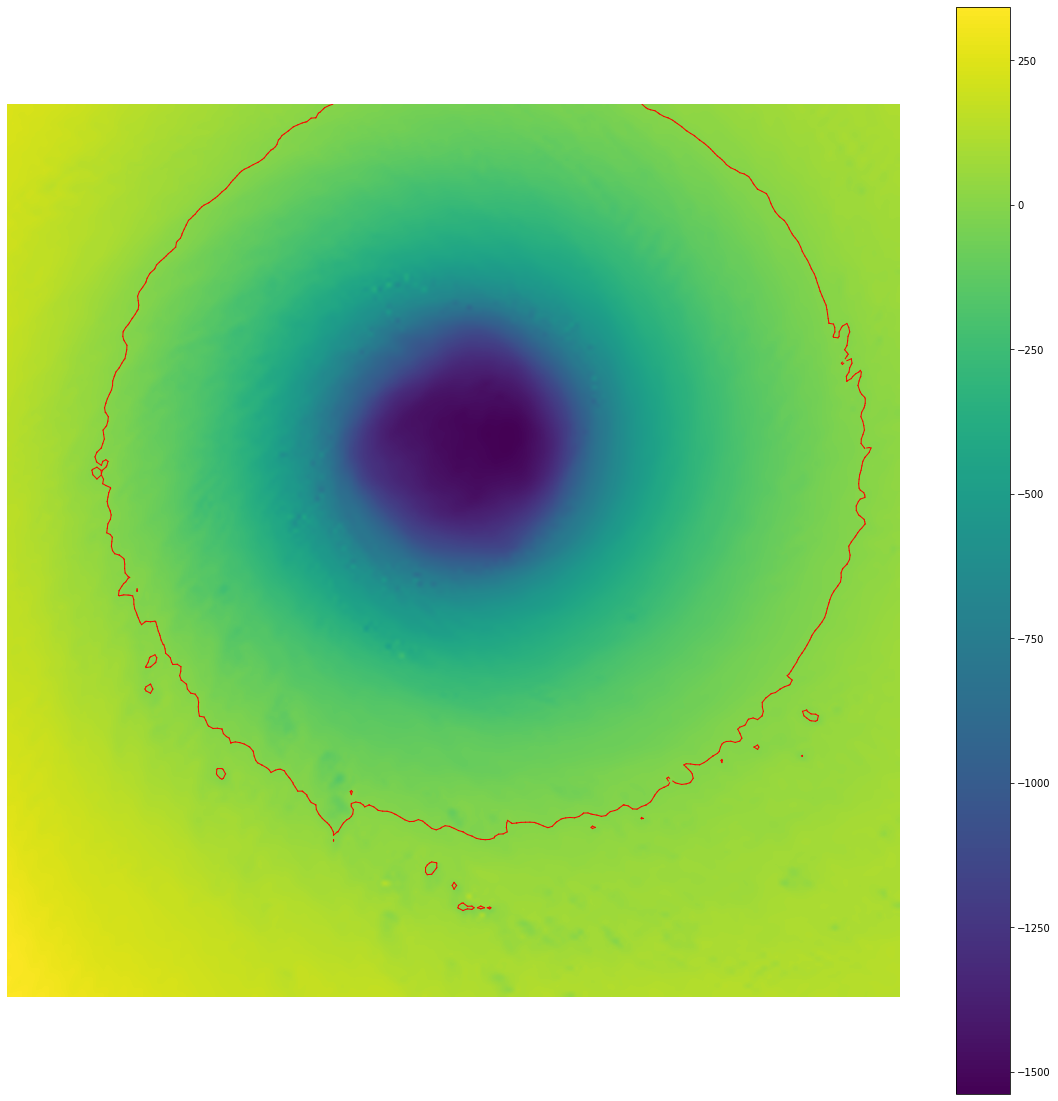

In [ ]:
##### main 
Initialize()

##### You can modify this function call to test your program on different isovalues
computePlotIsoContour(0, "red")

plt.show()

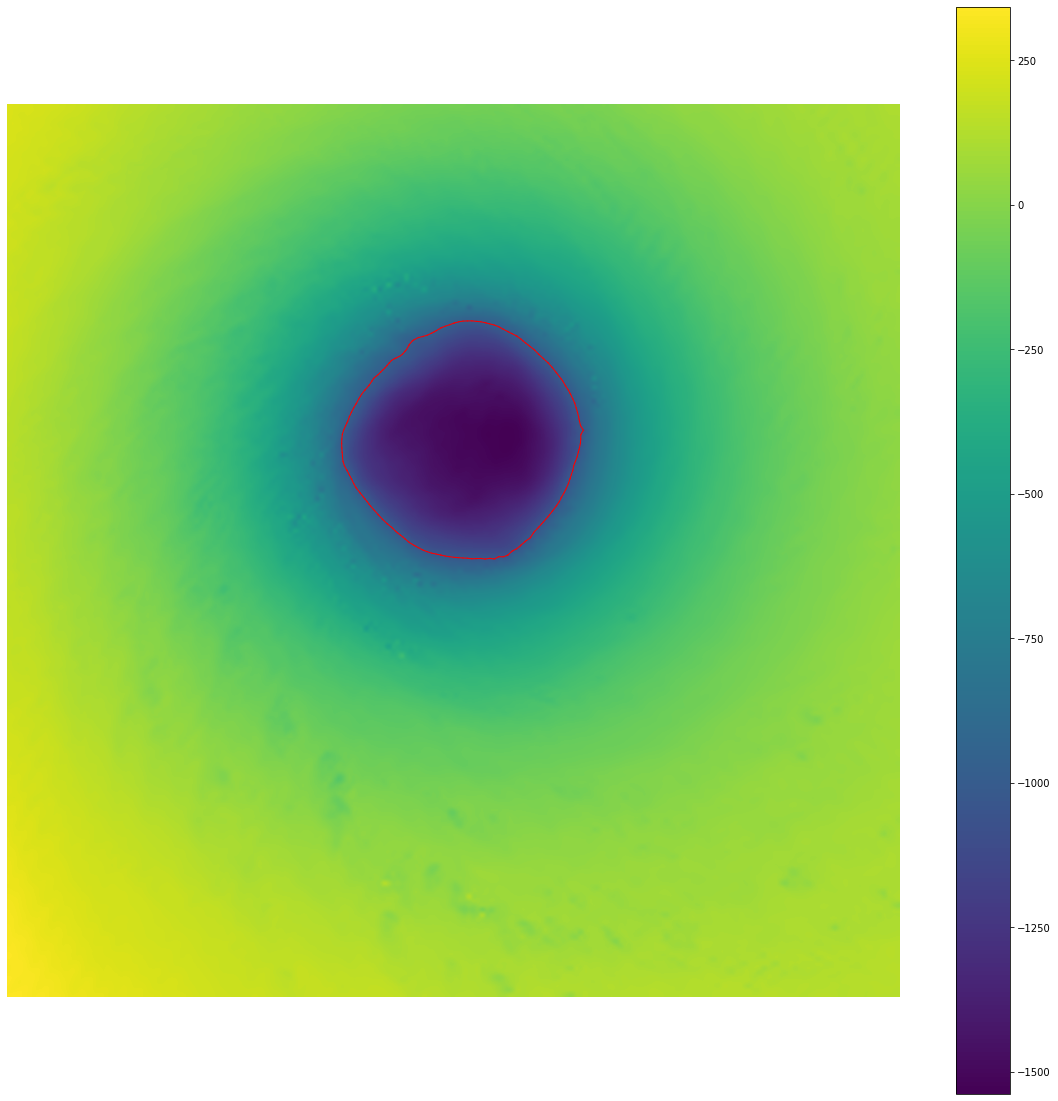

In [ ]:
##### main 
Initialize()

##### You can modify this function call to test your program on different isovalues
computePlotIsoContour(-1000, "red")

plt.show()

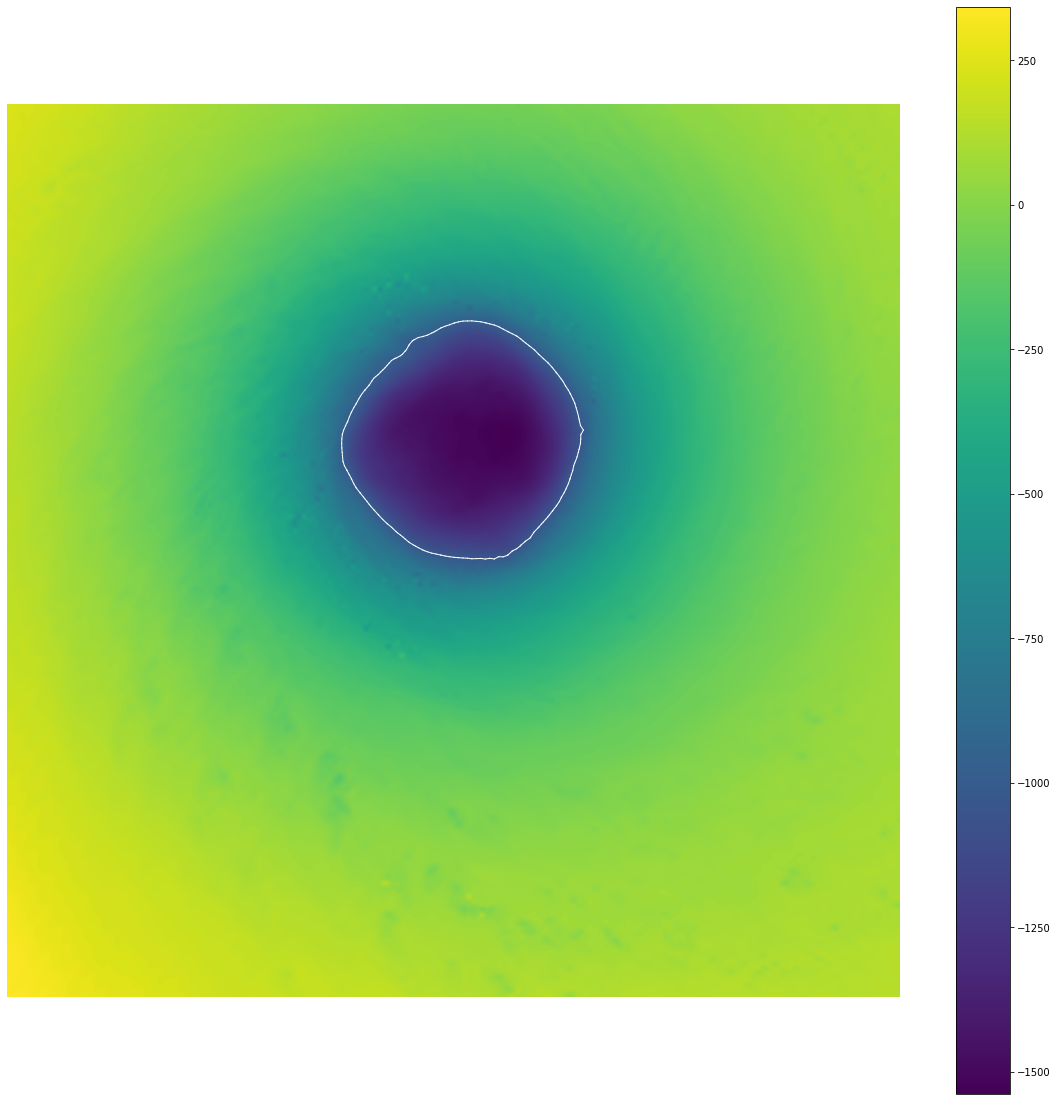

In [ ]:
##### main 
Initialize()

##### You can modify this function call to test your program on different isovalues
computePlotIsoContour(-1000, "white")

plt.show()